In [2]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

Enabling Cache

In [3]:
fastf1.Cache.enable_cache('./cache')  

In [8]:
schedule_df = pd.DataFrame()

for i in range(1950, 2023+1):
    session = fastf1.get_event_schedule(i)
    schedule_df = pd.concat([schedule_df, session])

schedule_df.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,1,UK,Silverstone,,1950-05-13,British Grand Prix,conventional,Practice 1,1950-05-11,Practice 2,1950-05-11,Practice 3,1950-05-12,Qualifying,1950-05-12,Race,1950-05-13,False
1,2,Monaco,Monte-Carlo,,1950-05-21,Monaco Grand Prix,conventional,Practice 1,1950-05-19,Practice 2,1950-05-19,Practice 3,1950-05-20,Qualifying,1950-05-20,Race,1950-05-21,False
2,3,USA,Indianapolis,,1950-05-30,Indianapolis 500,conventional,Practice 1,1950-05-28,Practice 2,1950-05-28,Practice 3,1950-05-29,Qualifying,1950-05-29,Race,1950-05-30,False
3,4,Switzerland,Bern,,1950-06-04,Swiss Grand Prix,conventional,Practice 1,1950-06-02,Practice 2,1950-06-02,Practice 3,1950-06-03,Qualifying,1950-06-03,Race,1950-06-04,False
4,5,Belgium,Spa,,1950-06-18,Belgian Grand Prix,conventional,Practice 1,1950-06-16,Practice 2,1950-06-16,Practice 3,1950-06-17,Qualifying,1950-06-17,Race,1950-06-18,False


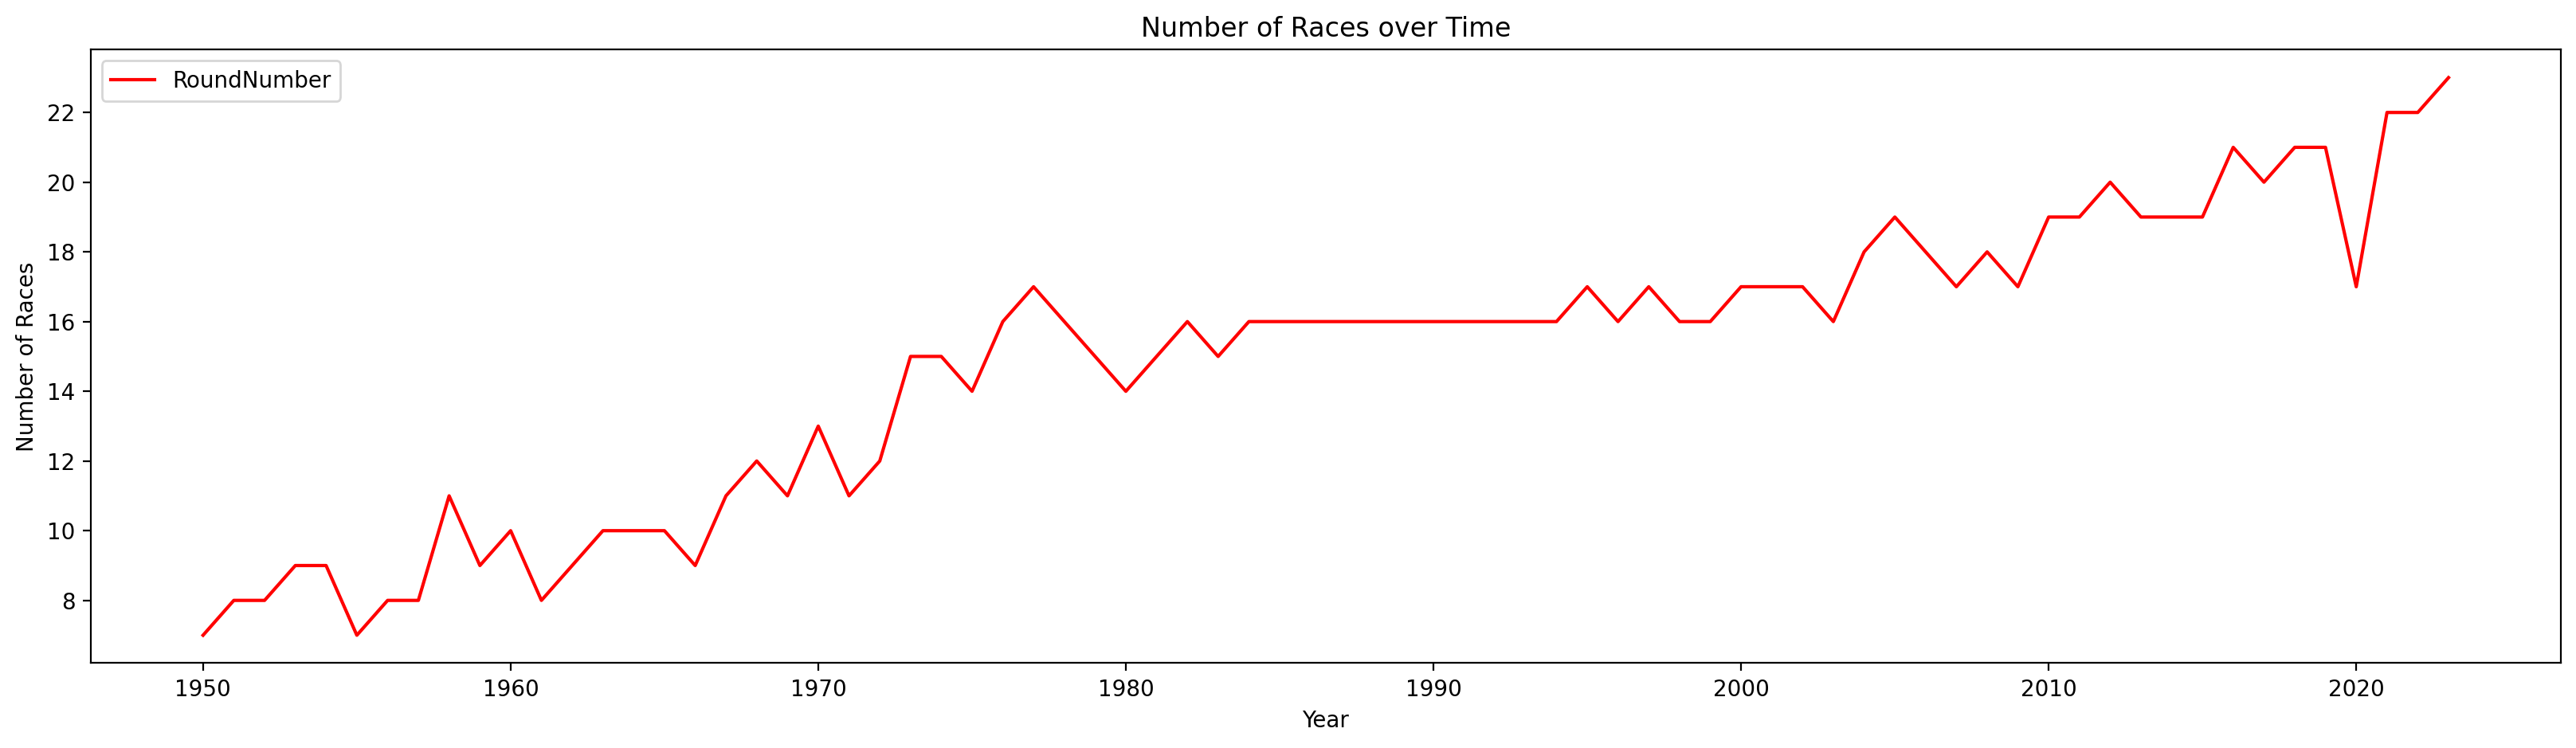

In [26]:
schedule_df["year"] = schedule_df.apply(lambda s: s["Session5Date"].year, axis=1)
df = schedule_df.groupby(["year"]).count()
df = df[["RoundNumber"]]
ax = df.plot.line(y="RoundNumber", use_index=True, color="red", figsize=(20,5))
ax.set_xlabel("Year");
ax.set_ylabel("Number of Races");
ax.set_title("Number of Races over Time");